# Face Mask Detection - Deep Learning (CNN)
This project involves building a Convolutional Neural Network (CNN) to classify images as either "with mask" or "without mask". The goal is to create a model capable of detecting whether individuals in images are wearing face masks, a crucial application in ensuring public safety during health crises.

## Project Overview
The Face Mask Detection project uses a Convolutional Neural Network (CNN) to classify images as either with mask or without mask. The dataset contains 7,553 images, and the images were resized, labeled, and split into training and testing sets. The model, built using TensorFlow and Keras, includes convolutional and dense layers with dropout for regularization. After training, the model achieved high accuracy in predicting mask usage and can be used for monitoring public health compliance.

## Problem Statement
In the context of public health crises, such as the COVID-19 pandemic, enforcing mask mandates has become a crucial measure to limit the spread of infectious diseases. However, manually monitoring mask compliance in crowded public spaces is both time-consuming and prone to human error.

The challenge is to develop an automated, reliable, and scalable system that can detect whether individuals are wearing face masks from images or live video feeds. This system needs to accurately classify images into "with mask" or "without mask" categories, ensuring rapid and effective enforcement of mask policies, especially in high-traffic areas like airports, malls, and transportation hubs.

This project aims to solve the problem by building a machine learning model capable of real-time mask detection, thereby supporting public health efforts and enhancing safety in various settings.

## Dataset
The [dataset](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset) used in this project consists of 7,553 images categorized into two classes:
- **With Mask:** 3,725 images
- **Without Mask:** 3,828 images

**Key Features:**
- **Image Resolution:** All images were resized to 128x128 pixels for uniformity.
- **Image Format:** Each image was converted to RGB format.
- **Class Labels:**
  - 1 for images where the person is wearing a mask.
  - 0 for images where the person is not wearing a mask.

The dataset contains a diverse set of images with varying backgrounds, lighting conditions, and angles, making it a robust source for training a model to detect mask usage in real-world scenarios.

In [43]:
# Install kaggle API and configure kaggle.json for access
!pip install kaggle

In [44]:
# Set up the path for kaggle.json and set appropriate file permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Importing Face Mask Dataset**

In [45]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
# extracting the compressed dataset
from zipfile import ZipFile
file_name = '/content/face-mask-dataset.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [47]:
# Check extracted files
!ls

 data   face-mask-dataset.zip  'man without mask.JPG'   sample_data  'Woman in a bus mask.JPG'


**Import Dependencies**

In [48]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [49]:
# Load filenames for images with and without masks
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [50]:
# Preview some filenames
print(with_mask_files[:10])
print(with_mask_files[-10:])

['with_mask_2448.jpg', 'with_mask_1503.jpg', 'with_mask_2308.jpg', 'with_mask_1546.jpg', 'with_mask_3616.jpg', 'with_mask_685.jpg', 'with_mask_139.jpg', 'with_mask_3123.jpg', 'with_mask_3431.jpg', 'with_mask_229.jpg']
['with_mask_1751.jpg', 'with_mask_1676.jpg', 'with_mask_1419.jpg', 'with_mask_1434.jpg', 'with_mask_3523.jpg', 'with_mask_2574.jpg', 'with_mask_676.jpg', 'with_mask_3224.jpg', 'with_mask_2812.jpg', 'with_mask_181.jpg']


In [51]:
# Preview some filenames
print(without_mask_files[:10])
print(without_mask_files[-10:])

['without_mask_3775.jpg', 'without_mask_2491.jpg', 'without_mask_1774.jpg', 'without_mask_1930.jpg', 'without_mask_48.jpg', 'without_mask_1630.jpg', 'without_mask_388.jpg', 'without_mask_2367.jpg', 'without_mask_16.jpg', 'without_mask_1594.jpg']
['without_mask_267.jpg', 'without_mask_2585.jpg', 'without_mask_2995.jpg', 'without_mask_2591.jpg', 'without_mask_1560.jpg', 'without_mask_2132.jpg', 'without_mask_565.jpg', 'without_mask_734.jpg', 'without_mask_1825.jpg', 'without_mask_353.jpg']


In [52]:
# Print the number of images in each category
print('Number of With Mask Images: ', len(with_mask_files))
print('Number of Without Mask Images: ', len(without_mask_files))

Number of With Mask Images:  3725
Number of Without Mask Images:  3828


**Creating labels for the two classes of images**

With mask = 1

Without mask = 0

In [53]:
# Create labels: 1 for with mask, 0 for without mask
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [54]:
# Preview labels
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [55]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [56]:
# Combine labels
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

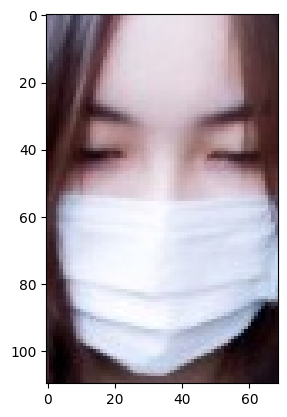

In [57]:
# Display with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_344.jpg')
imgplot = plt.imshow(img)
plt.show()


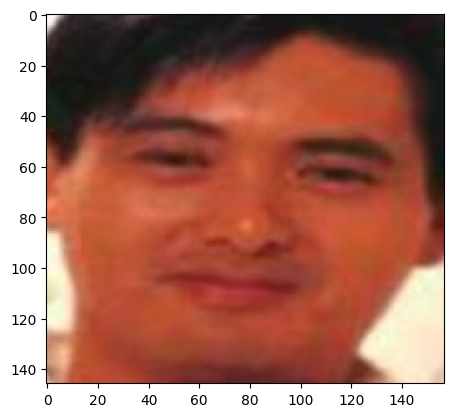

In [58]:
# Display without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3364.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**
1. Resize the images
2. Convert the images to numpy arrays

In [59]:
# Resize and convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data =[]

# Process with mask images
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [60]:
  # Process without mask images
  without_mask_path = '/content/data/without_mask/'

  for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [61]:
len(data)

7553

array([[[189, 182, 174],
        [190, 183, 175],
        [190, 183, 175],
        ...,
        [175, 171, 162],
        [173, 169, 160],
        [170, 166, 157]],

       [[190, 183, 175],
        [190, 183, 175],
        [190, 183, 175],
        ...,
        [174, 170, 161],
        [173, 169, 160],
        [171, 167, 158]],

       [[191, 184, 176],
        [191, 184, 176],
        [192, 185, 177],
        ...,
        [174, 170, 161],
        [173, 169, 160],
        [172, 168, 159]],

       ...,

       [[ 84,  96, 107],
        [ 69,  80,  94],
        [ 61,  76,  92],
        ...,
        [ 27,  36,  43],
        [ 23,  33,  37],
        [ 15,  25,  27]],

       [[ 69,  84,  98],
        [ 61,  75,  91],
        [ 52,  69,  85],
        ...,
        [ 25,  33,  39],
        [ 20,  29,  33],
        [ 12,  21,  24]],

       [[ 60,  77,  93],
        [ 54,  71,  87],
        [ 46,  63,  79],
        ...,
        [ 24,  31,  37],
        [ 19,  26,  31],
        [ 14,  22,  25]]], dtype=uint8)
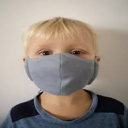

In [62]:
data[0]

In [63]:
type(data[0])

numpy.ndarray

In [64]:
data[0].shape

(128, 128, 3)

In [65]:
# Convert data and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [66]:
type(X)

numpy.ndarray

In [67]:
type(Y)

numpy.ndarray

In [68]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [69]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [70]:
print()
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)



x_train shape:  (6042, 128, 128, 3)
x_test shape:  (1511, 128, 128, 3)
y_train shape:  (6042,)
y_test shape:  (1511,)


In [71]:
# Scale the data by dividing by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[112, 106, 110],
        [110, 104, 108],
        [106,  99, 103],
        ...,
        [ 61,  71,  80],
        [ 55,  65,  74],
        [ 52,  62,  71]],

       [[114, 108, 112],
        [111, 105, 109],
        [103,  97, 101],
        ...,
        [ 62,  72,  81],
        [ 54,  64,  74],
        [ 51,  61,  70]],

       [[102,  96, 101],
        [ 97,  92,  96],
        [ 86,  83,  87],
        ...,
        [ 63,  73,  81],
        [ 53,  64,  72],
        [ 49,  60,  68]],

       ...,

       [[242, 241, 246],
        [240, 240, 244],
        [236, 236, 240],
        ...,
        [219, 207, 200],
        [221, 211, 204],
        [222, 213, 206]],

       [[240, 238, 243],
        [239, 238, 243],
        [239, 237, 243],
        ...,
        [216, 204, 196],
        [221, 209, 202],
        [222, 211, 205]],

       [[237, 236, 241],
        [238, 237, 242],
        [241, 240, 245],
        ...,
        [214, 202, 194],
        [220, 207, 201],
        [223, 210, 204]]], dtype=uint8)
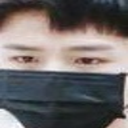

In [72]:
x_train[0]

In [73]:
x_train_scaled[0]

array([[[0.43921569, 0.41568627, 0.43137255],
        [0.43137255, 0.40784314, 0.42352941],
        [0.41568627, 0.38823529, 0.40392157],
        ...,
        [0.23921569, 0.27843137, 0.31372549],
        [0.21568627, 0.25490196, 0.29019608],
        [0.20392157, 0.24313725, 0.27843137]],

       [[0.44705882, 0.42352941, 0.43921569],
        [0.43529412, 0.41176471, 0.42745098],
        [0.40392157, 0.38039216, 0.39607843],
        ...,
        [0.24313725, 0.28235294, 0.31764706],
        [0.21176471, 0.25098039, 0.29019608],
        [0.2       , 0.23921569, 0.2745098 ]],

       [[0.4       , 0.37647059, 0.39607843],
        [0.38039216, 0.36078431, 0.37647059],
        [0.3372549 , 0.3254902 , 0.34117647],
        ...,
        [0.24705882, 0.28627451, 0.31764706],
        [0.20784314, 0.25098039, 0.28235294],
        [0.19215686, 0.23529412, 0.26666667]],

       ...,

       [[0.94901961, 0.94509804, 0.96470588],
        [0.94117647, 0.94117647, 0.95686275],
        [0.9254902 , 0

**Building a Convolution Neural Network (CNN)**

In [74]:
# Define a CNN model architecture
import tensorflow as tf
from tensorflow import keras


In [75]:
num_of_classes = 2

model = keras.Sequential()

# Add convolutional and pooling layers
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flatten the output
model.add(keras.layers.Flatten())

# Add dense layers with dropout for regularization
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# Output layer with 2 classes (mask or no mask)
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [77]:
# Training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.6623 - loss: 0.6753 - val_acc: 0.8463 - val_loss: 0.3434
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - acc: 0.8848 - loss: 0.3008 - val_acc: 0.8645 - val_loss: 0.2802
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9029 - loss: 0.2526 - val_acc: 0.9174 - val_loss: 0.2257
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9140 - loss: 0.2133 - val_acc: 0.9107 - val_loss: 0.1902
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.9293 - loss: 0.1822 - val_acc: 0.9124 - val_loss: 0.1976


**Model Evaluation**

In [78]:
# Evaluate model performance on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9246 - loss: 0.2066
Test Accuracy =  0.9291859865188599


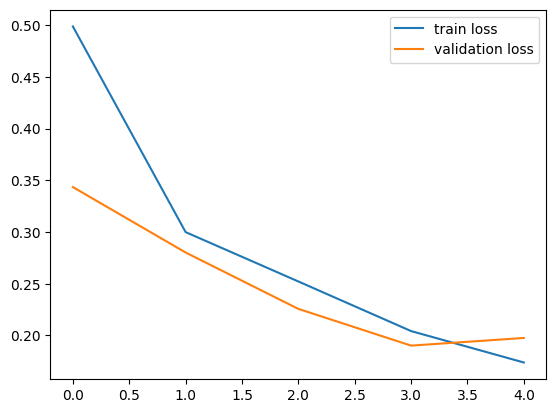

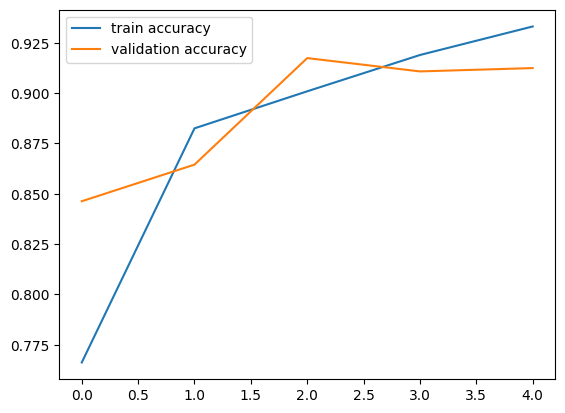

In [79]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Building a predictive system**

Enter the path of the image to be predicted: /content/man without mask.JPG


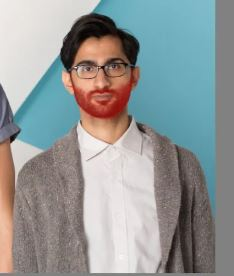

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[0.3537016  0.61529607]]
1
The person in the image is not wearing a mask


In [80]:
# Predict mask/no mask for a new image
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Preprocess the input image for prediction
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# Make prediction
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

# Output prediction result
if input_pred_label == 0:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')

Enter the path of the image to be predicted: /content/Woman in a bus mask.JPG


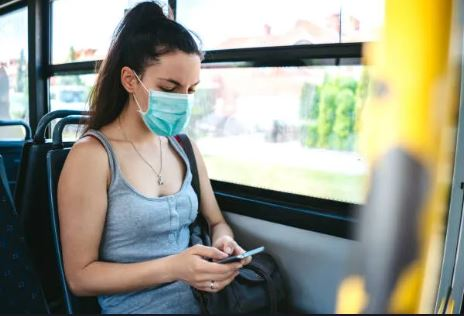

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.50825894 0.49738386]]
0
The person in the image is wearing a mask


In [81]:
# Predict mask/no mask for a new image
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Preprocess the input image for prediction
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# Make prediction
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

# Output prediction result
if input_pred_label == 0:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')